In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random

In [48]:
spotify_data = pd.read_csv(r'SpotifyFeatures.csv')

In [49]:
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [50]:
# no null values
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [51]:
spotify_data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [52]:
duplicate_rows = spotify_data[spotify_data.duplicated(subset='track_id')]
duplicate_rows

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.07160,0.710,217813,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.700
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.370
1452,Alternative,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,56,0.77900,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.130
1554,Alternative,Steve Lacy,Some,4riDfclV7kPDT9D58FpmHd,58,0.00548,0.784,118393,0.554,0.254000,G,0.0995,-6.417,Major,0.0300,104.010,4/4,0.634
1634,Alternative,tobi lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,59,0.19000,0.736,215385,0.643,0.000000,F,0.1060,-8.636,Major,0.0461,156.002,4/4,0.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.436
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.945
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813


In [53]:
spotify_data[spotify_data['track_id'] == '14msK75pk3pA33pzPVNtBF']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.0,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.0,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319


In [54]:
spotify_data['genre'].nunique()

27

In [55]:
spotify_data['popularity'].nunique()

101

In [56]:
# converting duration from miliseconds to minutes
spotify_data['duration_minutes'] = spotify_data['duration_ms'].apply(lambda x: x / 60000)

In [57]:
spotify_data['duration_minutes']

0         1.656217
1         2.289550
2         2.837783
3         2.540450
4         1.377083
            ...   
232720    5.437333
232721    4.707450
232722    2.782667
232723    3.707367
232724    5.383783
Name: duration_minutes, Length: 232725, dtype: float64

In [58]:
print("Longest track: {}".format(max(spotify_data['duration_minutes'])))
print("Shortest track: {}".format(min(spotify_data['duration_minutes'])))

Longest track: 92.54861666666666
Shortest track: 0.25645


In [59]:
print("Highest popularity value: {}".format(max(spotify_data['popularity'])))
print("Lowest popularity value: {}".format(min(spotify_data['popularity'])))

Highest popularity value: 100
Lowest popularity value: 0


In [60]:
track_with_longest_duration = spotify_data[spotify_data['duration_minutes'] == max(spotify_data['duration_minutes'])]
track_with_longest_duration

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes
212083,Comedy,La Mesa Reñoña,"Episodio 15 (Lady Orinoco, Políticas De Youtub...",76vVk4HCOLP5r7hA53SyXg,22,0.846,0.468,5552917,0.58,0.0,C,0.138,-11.615,Major,0.412,72.69,3/4,0.801,92.548617


In [61]:
track_with_highest_popularity = spotify_data[spotify_data['popularity'] == max(spotify_data['popularity'])]
track_with_highest_popularity

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.0,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319,2.977333
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.0,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319,2.977333


                  how many
genre                     
A Capella              119
Children's Music      5403
Movie                 7806
Opera                 8280
Country               8664
Dance                 8701
Reggae                8771
Ska                   8874
Reggaeton             8927
Anime                 8936
R&B                   8992
Blues                 9023
Soul                  9089
World                 9096
Rap                   9232
Classical             9256
Alternative           9263
Rock                  9272
Hip-Hop               9295
Folk                  9299
Children’s Music      9353
Electronic            9377
Pop                   9386
Jazz                  9441
Indie                 9543
Soundtrack            9646
Comedy                9681


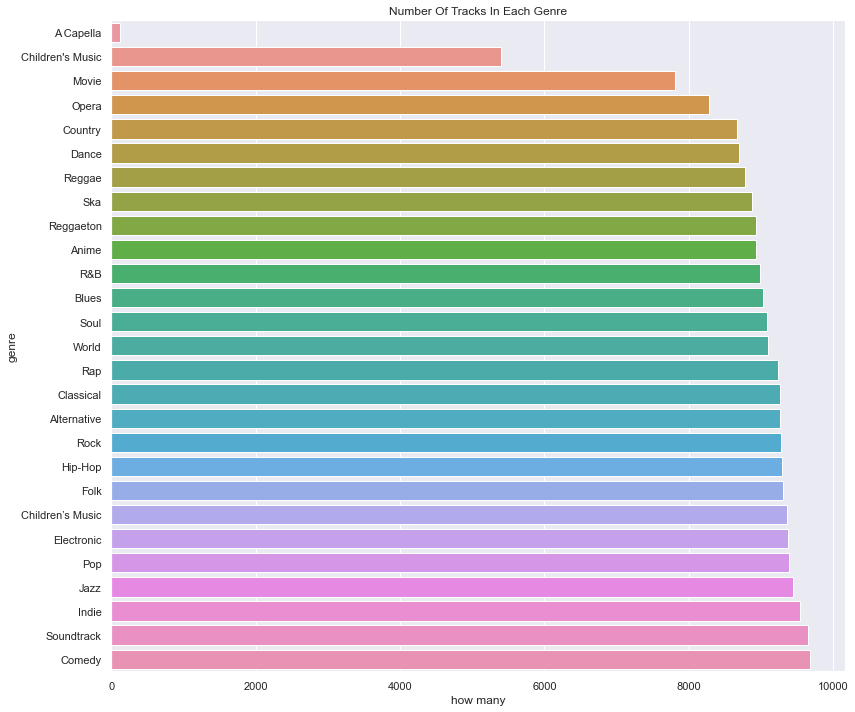

In [62]:
# Genre with the highest number of tracks

# print(spotify_data['genre'].value_counts(ascending=True))

number_of_tracks_by_genre = pd.DataFrame(data=spotify_data.groupby('genre').size(),columns=['how many']).sort_values(
    by='how many')
print(number_of_tracks_by_genre)

# sns.set(font_scale=5)
plt.subplots(figsize=(12,10))
sns.barplot(x='how many',y=number_of_tracks_by_genre.index,data=number_of_tracks_by_genre).set(
    title="Number Of Tracks In Each Genre")

plt.tight_layout()
plt.show()

                  popularity
genre                       
Children's Music    4.252637
A Capella           9.302521
Movie              12.174097
Opera              13.335628
Comedy             21.342630
Anime              24.258729
Ska                28.612351
Classical          29.282195
Soundtrack         33.954800
Blues              34.742879
World              35.524077
Reggae             35.589328
Reggaeton          37.742915
Electronic         38.056095
Jazz               40.824383
Country            46.100416
Soul               47.027836
Folk               49.940209
Alternative        50.213430
R&B                52.308719
Children’s Music   54.659040
Indie              54.701561
Dance              57.275256
Hip-Hop            58.423131
Rock               59.619392
Rap                60.533795
Pop                66.590667


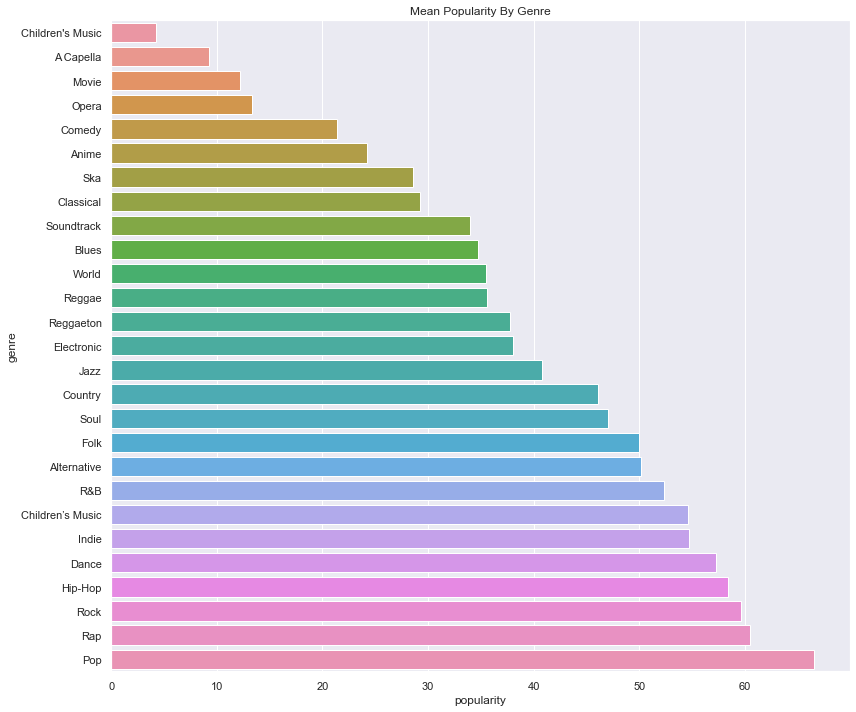

In [63]:
# Popularity of each genre

mean_popularity_by_genre = pd.DataFrame(data=spotify_data.groupby('genre')['popularity'].mean()).sort_values(
    by='popularity')
print(mean_popularity_by_genre)

plt.subplots(figsize=(12,10))
sns.barplot(x='popularity',y=mean_popularity_by_genre.index,data=mean_popularity_by_genre).set(
    title="Mean Popularity By Genre")

plt.tight_layout()
plt.show()

In [64]:
popularity_how_many_df = number_of_tracks_by_genre.join(mean_popularity_by_genre)
popularity_how_many_df

,how many,popularity
genre,,
A Capella,119,9.302521
Children's Music,5403,4.252637
Movie,7806,12.174097
Opera,8280,13.335628
Country,8664,46.100416
Dance,8701,57.275256
Reggae,8771,35.589328
Ska,8874,28.612351
Reggaeton,8927,37.742915


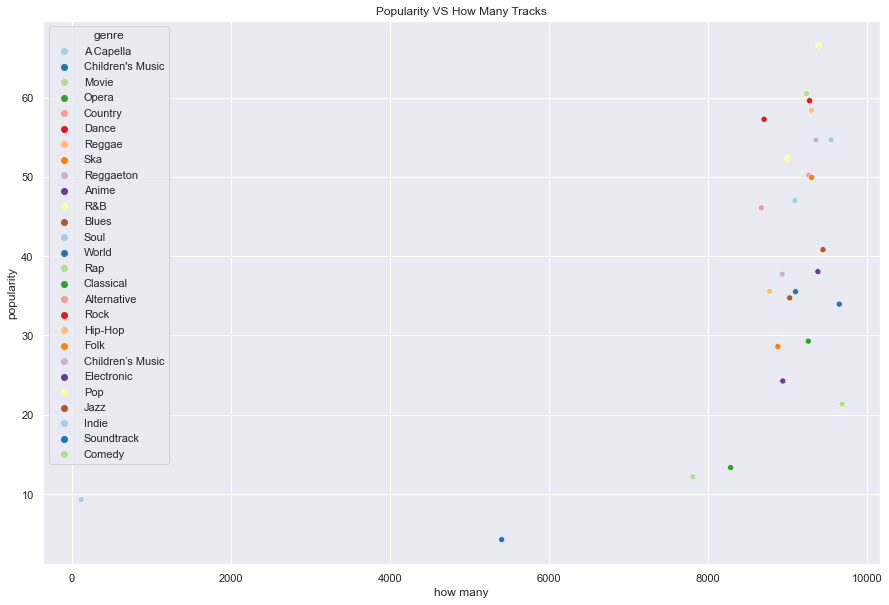

In [65]:
sns.set()

plt.subplots(figsize=(15,10))
sns.scatterplot(x='how many', y='popularity',data=popularity_how_many_df, palette='Paired', hue='genre').set(
    title="Popularity VS How Many Tracks")

plt.show()

# The more the number of tracks gets higher, the popularity grows.
# Genres with more than 8000 tracks have higher popularity rate.

                  duration_minutes
genre                             
Children's Music          2.378780
Ska                       3.192477
Soundtrack                3.210196
A Capella                 3.407795
Movie                     3.506756
Country                   3.620625
Rap                       3.664231
Hip-Hop                   3.666365
Pop                       3.680986
Indie                     3.735840
R&B                       3.762469
Dance                     3.771082
Anime                     3.832284
Reggaeton                 3.867286
Children’s Music          3.875907
Alternative               3.887356
Soul                      3.911906
Comedy                    3.921754
Folk                      3.930091
Rock                      3.950054
Reggae                    3.991726
Blues                     4.198864
Opera                     4.319352
Jazz                      4.427421
Electronic                4.486600
Classical                 5.172333
World               

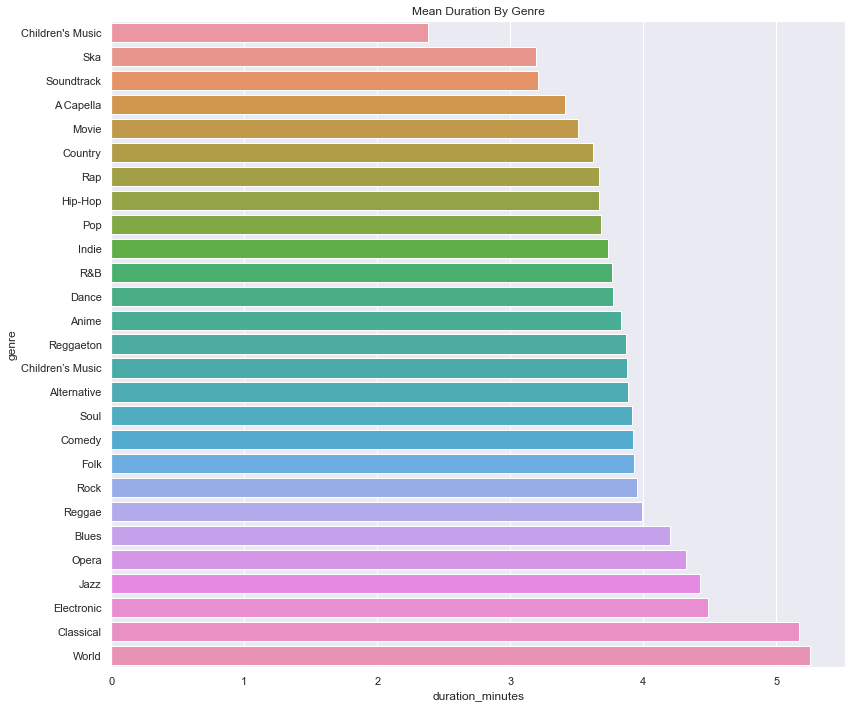

In [66]:
# mean duration of each genre

mean_duration_by_genre = pd.DataFrame(spotify_data.groupby('genre')['duration_minutes'].mean()).sort_values(
    by='duration_minutes')
print(mean_duration_by_genre)

plt.subplots(figsize=(12,10))
sns.barplot(x='duration_minutes',y=mean_duration_by_genre.index,data=mean_duration_by_genre).set(
    title="Mean Duration By Genre")

plt.tight_layout()
plt.show()

In [67]:
# duration vs popularity
popularity_duration_df = mean_popularity_by_genre.join(mean_duration_by_genre)
popularity_duration_df

,popularity,duration_minutes
genre,,
Children's Music,4.252637,2.378780
A Capella,9.302521,3.407795
Movie,12.174097,3.506756
Opera,13.335628,4.319352
Comedy,21.342630,3.921754
Anime,24.258729,3.832284
Ska,28.612351,3.192477
Classical,29.282195,5.172333
Soundtrack,33.954800,3.210196


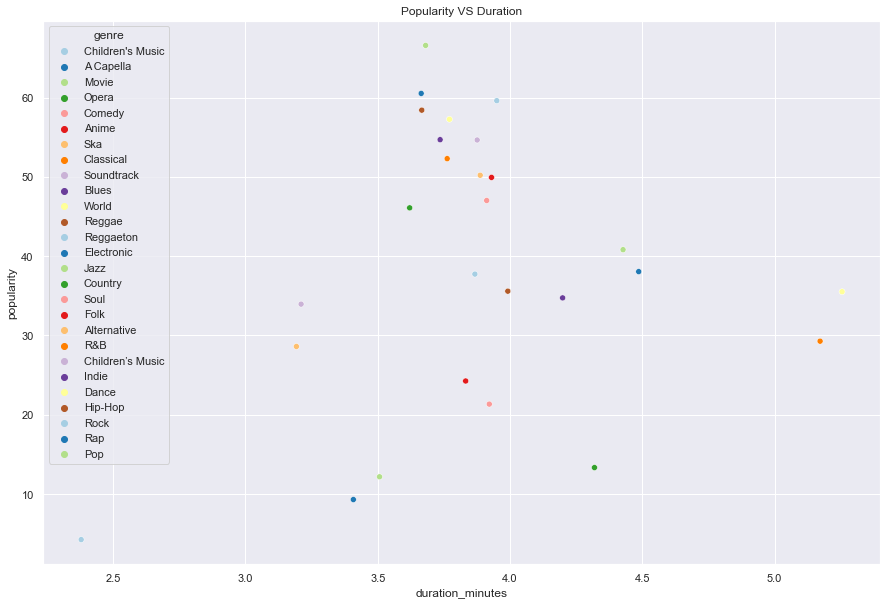

In [68]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x='duration_minutes', y='popularity',data=popularity_duration_df, palette='Paired', hue='genre').set(
    title="Popularity VS Duration")

plt.show()